In [11]:
import numpy as np
from pathlib import Path
import shutil
import warnings

from eddymotion.data import pet
from eddymotion.model import PETModel
from eddymotion.viz import plot_dwi
import nibabel as nib
from eddymotion.data.splitting import lovo_split

In [12]:
base_dir = Path("/Users/martinnorgaard/Documents/BIDS/")
bids_dir = base_dir / "ds005138-download"
derivatives_dir = base_dir / "eddymotion"

pet_file = bids_dir / "sub-01" / "ses-baseline" / "pet" / "sub-01_ses-baseline_pet.nii.gz"
json_file = bids_dir / "sub-01" / "ses-baseline" / "pet" / "sub-01_ses-baseline_pet.json"

pet_dataset = pet.PET.load(pet_file, json_file)

In [3]:
data_train, data_test = pet_dataset.lofo_split(15)

In [4]:
model = PETModel(timepoints=data_train[1], xlim = 7000)

In [5]:
model.fit(data_train[0])

In [6]:
predicted = model.predict(data_test[1])

In [7]:
# before
nifti_img_before = nib.Nifti1Image(predicted, pet_dataset.affine)
output_path_before = 'before_mc.nii'
nifti_img_before.to_filename(output_path_before)

# after
nifti_img_after = nib.Nifti1Image(data_test[0], pet_dataset.affine)
output_path_after = 'after_mc.nii'
nifti_img_after.to_filename(output_path_after)

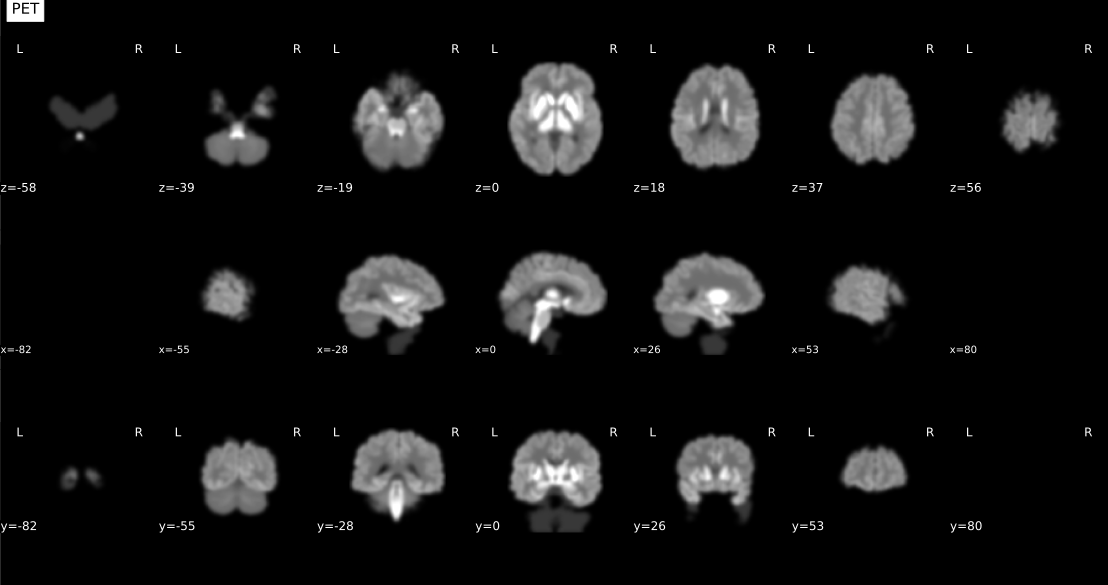

In [13]:
from niworkflows.viz.notebook import display
import os
from IPython.display import SVG

moving_image = output_path_after
fixed_image = output_path_before
obj = display(fixed_image, moving_image, fixed_label='PET_before', moving_label='PET')

In [13]:
from eddymotion.estimator import PETMotionEstimator

In [14]:
estimator = PETMotionEstimator.estimate(pet_dataset, omp_nthreads=4, n_jobs=4)

Estimating PET motion: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:43<00:00,  2.05s/it]


In [15]:
estimator

[array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]),
 array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]),
 array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]),
 array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]),
 array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]),
 array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]),
 array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]),
 array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]),
 array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]),
 array([[1., 0., 0., 0.],
        [0., 1., 0.,

In [ ]:
estimator.